# Generating Mathematical Artwork For NFTs Through Samila And Python

Today, non fungible tokens (NFTs) are one of the most talked about topics in the cryptoworld. In light to this, this lesson covers how you can make actual artworks using mathematics through an open-source Python package called Samila.

The concept behind what Samila is based upon is simple to understand: when you transform a square-shaped space from the Cartesian coordinate system to any other arbitrary coordinate system, you generate a plot that feels like art.

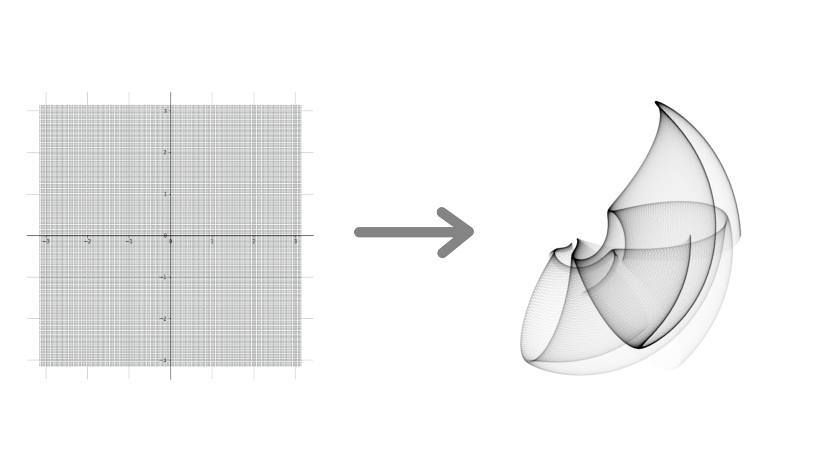

## Installing and Importing Samila in Python

You can install Samila using the Python Package Manager (pip). 

For this tutorial, we will be using version 0.3 since it is the latest release of the package. Open up your command line/terminal and execute the following command to install Samila.

```pip install samila==0.3```

To test if your installation is correct, you can try out the following line of import,

In [1]:
import samila

If you do not get any error when executing this import, then, you've successfully installed and imported Samila in Python. Now, let's move on to create our generative art.

## Getting Started with Samila

Let us start by importing the necessary libraries,

In [2]:
# Importing necessary libraries
import random
import math
import matplotlib.pyplot as plt

from samila import GenerativeImage, Projection

Now, let us define two functions according to Samila's GitHub example to create our transformations,

In [3]:
def f1(x, y):
    result = random.uniform(-1,1) * x**2  - math.sin(y**2) + abs(y-x)
    return result

def f2(x, y):
    result = random.uniform(-1,0) * y**3 - math.cos(x**2) + 2*x
    return result

Now, we simply use the `GenerativeImage` class and its methods `generate()` and `plot()` to create generative art.

Note: We will dive deep into how these values are generated and plotted by looking at the actual code behind the two methods later down this tutorial. Hopefully, by then, you will be able to contribute to Samila on your own. But, for now, let us simply see what kind of art Samila can generate.

In [4]:
DEFAULT_SEED = 1018273

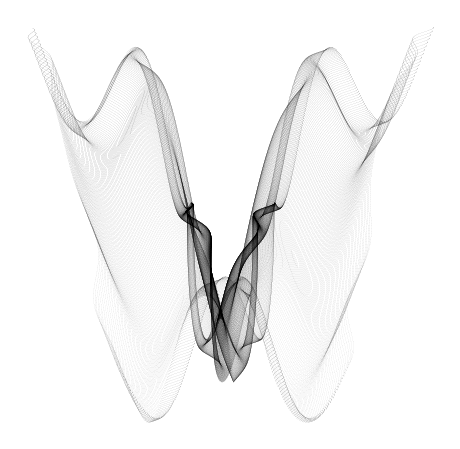

In [5]:
g = GenerativeImage(f1, f2)
g.generate(seed=DEFAULT_SEED)
g.plot(size=(8,8))

You can also specify the projection during plotting,

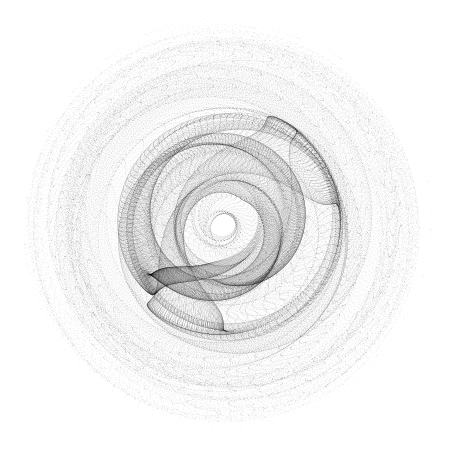

In [6]:
g.plot(projection=Projection.POLAR, size=(8,8))

You can also specify a new range for your square-shaped space to transform. The default is -pi to pi with a step of 0.01.

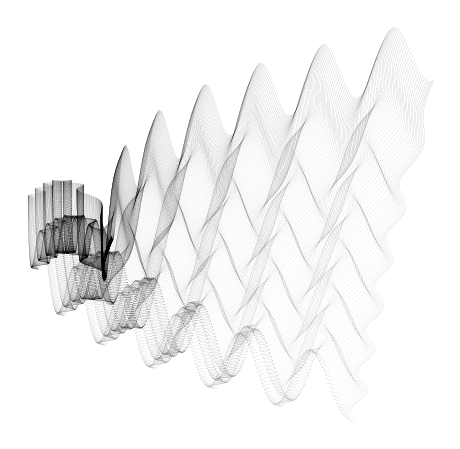

In [7]:
g = GenerativeImage(f1,f2)
g.generate(start = -2*math.pi, step=0.01, stop=0)
g.plot(size=(8,8))

Finally, you can also add color to the generated artwork,

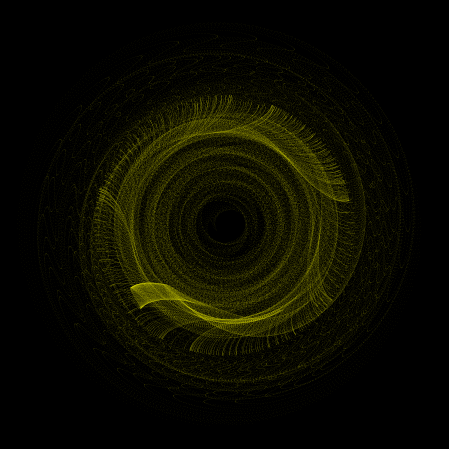

In [8]:
g.plot(color="yellow", bgcolor="black", projection=Projection.POLAR, size=(8,8))

## Saving your art locally

Samila provides the `save_image()` method to save your image locally.

In [9]:
g.save_image(file_adr="myart.png")

{'status': True, 'message': 'Everything seems good.'}

You can also use the `depth` parameter to save a higher resolution picture.

In [10]:
g.save_image(file_adr="myart.png", depth=5)

{'status': True, 'message': 'Everything seems good.'}

## Saving your art in NFT Storage

NFT Storage is a free decentralized storage that lets users store their NFT content and metadata seamlessly and securely with IPFS and Filecoin. You can read more about it detail <a href ="https://filecoin.io/blog/posts/introducing-nft.storage-free-decentralized-storage-for-nfts/">through the blog written by Filecoin</a>.

You can upload your generated images directly to NFT.storage using the `nft_storage()` method and by passing in your API key.

In [11]:
# g.nft_storage(api_key = "YOUR_API_KEY")

## How do the `generate()` and `plot()` methods work?

Now, let us take a deep dive into the code that is working under the hood to generate the values and to plot them. The methods we will discuss can be found in `genimage.py`.

- `generate()`

Let us see how the two functions that we defined earlier (f1 and f2) are used to generate values for plotting.

In [12]:
# Importing necessary library
import itertools

In [13]:
# Setting constant values
DEFAULT_START = -1 * math.pi
DEFAULT_STOP = math.pi
DEFAULT_STEP = 0.01

In [14]:
# Creating a helper function
def float_range(start, stop, step):
    while start < stop:
        yield float(start)
        start += step

Now, creating two ranges from -pi to pi with a step of 0.01. Here two ranges are created since we need both x-axis and y-axis coordinates for plotting.

In [15]:
range1 = list(float_range(start = DEFAULT_START, stop = DEFAULT_STOP, step = DEFAULT_STEP))
range2 = list(float_range(start = DEFAULT_START, stop = DEFAULT_STOP, step = DEFAULT_STEP))

In [16]:
len(range1)

629

In [17]:
range1[:5], range2[:5]

([-3.141592653589793,
  -3.1315926535897933,
  -3.1215926535897935,
  -3.1115926535897938,
  -3.101592653589794],
 [-3.141592653589793,
  -3.1315926535897933,
  -3.1215926535897935,
  -3.1115926535897938,
  -3.101592653589794])

Finding the cartesian product of the two ranges,

In [18]:
range_prod = list(itertools.product(range1, range2))

In [19]:
range_prod[:10]

[(-3.141592653589793, -3.141592653589793),
 (-3.141592653589793, -3.1315926535897933),
 (-3.141592653589793, -3.1215926535897935),
 (-3.141592653589793, -3.1115926535897938),
 (-3.141592653589793, -3.101592653589794),
 (-3.141592653589793, -3.091592653589794),
 (-3.141592653589793, -3.0815926535897944),
 (-3.141592653589793, -3.0715926535897946),
 (-3.141592653589793, -3.061592653589795),
 (-3.141592653589793, -3.051592653589795)]

In [20]:
len(range1), len(range2), len(range_prod)

(629, 629, 395641)

Finally, generating the values for plotting by passing them through our functions,

In [21]:
data1 = []
data2 = []

for item in range_prod:
    random.seed(DEFAULT_SEED)
    data1.append(f1(item[0], item[1]).real)
    data2.append(f2(item[0], item[1]).real)

In [22]:
data1[:5], data2[:5]

([-0.7704511054200163,
  -0.8178874989945458,
  -0.8666008600704345,
  -0.9163488015054453,
  -0.9668886371871384],
 [19.058436538587817,
  18.825803952267403,
  18.594652345970683,
  18.364976990538445,
  18.136773156811483])

We have now successfully generated the x-axis and y-axis values for plotting.

 - `plot()`

Next, let us see how `data1` and `data2` are plotted out. First, we will start by defining some constants,

In [23]:
# Setting valid colors for plotting
from matplotlib import colors as mcolors
VALID_COLORS = list(dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS).keys())
VALID_COLORS[:10]

['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'aliceblue', 'antiquewhite']

In [24]:
# Setting default parameters
DEFAULT_COLOR = "black"
DEFAULT_BACKGROUND_COLOR = "white"
DEFAULT_ALPHA = 0.1
DEFAULT_IMAGE_SIZE = (10, 10)
DEFAULT_SPOT_SIZE = 0.01
DEFAULT_PROJECTION = None

Next, creating helper functions for calculating Levenshtein distance between two words as well as for filtering a given color and returning it. 

In [25]:
def distance_calc(s1, s2):
    """
    Calculate Levenshtein distance between two words.
    :param s1: first string
    :type s1 : str
    :param s2: second string
    :type s2 : str
    :return: distance between two string
    References :
    1- https://stackoverflow.com/questions/2460177/edit-distance-in-python
    2- https://en.wikipedia.org/wiki/Levenshtein_distance
    """
    if len(s1) > len(s2):
        s1, s2 = s2, s1

    distances = range(len(s1) + 1)
    for i2, c2 in enumerate(s2):
        distances_ = [i2 + 1]
        for i1, c1 in enumerate(s1):
            if c1 == c2:
                distances_.append(distances[i1])
            else:
                distances_.append(
                    1 + min((distances[i1], distances[i1 + 1], distances_[-1])))
        distances = distances_
    return distances[-1]

In [26]:
def filter_color(color):
    """
    Filter given color and return it.
    :param color: given color
    :type color: str or tuple
    :return: filtered version of color
    """
    if isinstance(color, tuple):
        return color
    if isinstance(color, str):
        distance_list = list(map(lambda x: distance_calc(color, x),
                                 VALID_COLORS))
        min_distance = min(distance_list)
        return VALID_COLORS[distance_list.index(min_distance)]
    return None

Mapping the colors and background color,

In [27]:
color, bgcolor = map(filter_color, [DEFAULT_COLOR, DEFAULT_BACKGROUND_COLOR])

Creating the final plot,

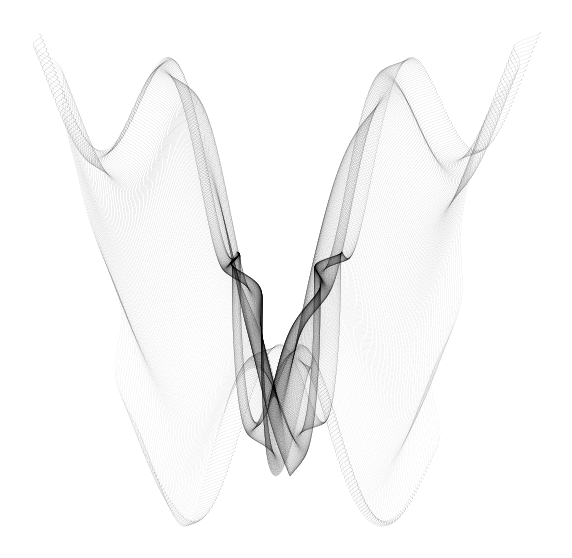

In [28]:
fig = plt.figure()
fig.set_size_inches(DEFAULT_IMAGE_SIZE[0], DEFAULT_IMAGE_SIZE[1])
fig.set_facecolor(bgcolor)
ax = fig.add_subplot(111)
ax.set_facecolor(bgcolor)
ax.scatter(
    data2,
    data1,
    alpha=DEFAULT_ALPHA,
    edgecolors=color,
    s=DEFAULT_SPOT_SIZE)
ax.set_axis_off()
ax.patch.set_zorder(-1)
ax.add_artist(ax.patch)

# In Conclusion

That is it for this lesson on Generating Mathematical Artwork For NFTs Through Samila And Python.

If you are interested in more things like this, The Click Reader provides you a large collection of data science resources to study from—check it out by heading over to www.theclickreader.com.